In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss 

import connectivity.constants as const
from connectivity.data import Dataset
import connectivity.model as model
import connectivity.data as data
import connectivity.run as run
import connectivity.visualize as vis
import connectivity.figures as fig 


/Users/jdiedrichsen/.local/share/virtualenvs/cerebellum_connectivity-lV1BGCUV/lib/python3.7/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


## Maedbh's original evaluation
Unweighted, without instructions and unique

In [2]:
df = vis.get_summary(exps=['sc2'])

In [3]:
pd.pivot_table(df,values='R_eval',index=['atlas','num_regions'],columns='method',aggfunc=len)

method                   WTA  lasso  ridge
atlas      num_regions                    
arslan     50           24.0   24.0   24.0
           100          24.0    NaN   24.0
           200          24.0    NaN   24.0
           250          24.0    NaN   24.0
baldassano 171           NaN   24.0    NaN
fan        210          24.0   24.0   24.0
glasser    360           NaN   24.0    NaN
gordon     333          24.0   24.0   24.0
mdtb       7            48.0    NaN   48.0
           10           24.0    NaN   24.0
           14           24.0    NaN   24.0
           17           24.0    NaN   24.0
           25           24.0    NaN   24.0
           50           24.0    NaN   24.0
           100          24.0    NaN   24.0
           200          24.0    NaN   24.0
           300          24.0    NaN   24.0
schaefer   100          24.0   24.0   24.0
           200          24.0   24.0   24.0
           300          24.0   24.0   24.0
shen       200          24.0   24.0   24.0
tessels    80           24.0   24.0   24.0
           304          24.0   24.0   24.0
           670          24.0   24.0   24.0
           1190         24.0   24.0   24.0
           1848         24.0   24.0   24.0
yeo        7            24.0   24.0   24.0
           17           24.0   24.0   24.0

In [2]:
# Select the right atlasses 
atlases = ['yeo','tessels','shen','gordon','fan']
atlases = ['tessels']
D = df[df['atlas'].isin(atlases)]
print(np.unique(D.num_regions))
print(D.columns)


NameError: name 'df' is not defined

<AxesSubplot:xlabel='num_regions'>

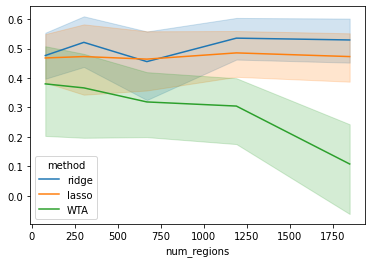

In [15]:
sns.lineplot(data=D,x='num_regions',y=D.R_eval/D.noiseceiling_XY,hue='method')

In [6]:
D1= df[np.logical_and(df.atlas=='tessels',df.num_regions==80)]
D1['R_std']=D1.R_eval/D1.noiseceiling_XY
T=pd.pivot_table(D1,values='R_std',index='subj_id',columns='method',aggfunc=np.mean)
ss.ttest_rel(T.WTA,T.ridge,nan_policy='omit')


Ttest_relResult(statistic=-1.0746759012848557, pvalue=0.29416569140707194)

# New evaluation: Weighted-including all 

In [12]:
df = vis.get_summary('eval',summary_name="weighted_all",exps=['sc2'],atlas=['tessels','yeo'])
df.columns

Index(['rmse_eval', 'subj_id', 'num_regions', 'name', 'glm', 'train_exp',
       'eval_exp', 'averaging', 'weighting', 'incl_inst', 'X_data', 'Y_data',
       'mode', 'splitby', 'save_maps', 'threshold', 'R_eval', 'R2',
       'noise_Y_R', 'noise_Y_R2', 'noise_X_R', 'noise_X_R2', 'timestamp',
       'atlas', 'method', 'noiseceiling_Y', 'noiseceiling_XY'],
      dtype='object')

<AxesSubplot:xlabel='num_regions', ylabel='R_std'>

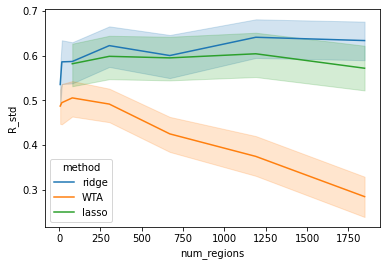

In [14]:
df['R_std']=df.R_eval / df.noiseceiling_XY
sns.lineplot(data=df,x='num_regions',y=df.R_std,hue='method')

In [16]:
D1= df[df.num_regions==17]
T=pd.pivot_table(D1,values='R_std',index='subj_id',columns='method',aggfunc=np.mean)
ss.ttest_rel(T.WTA,T.ridge,nan_policy='omit')

Ttest_relResult(statistic=-6.25943437968923, pvalue=2.186727360652315e-06)

# New evaluation: Weighted-including unique

[  80  304  670 1190 1848]


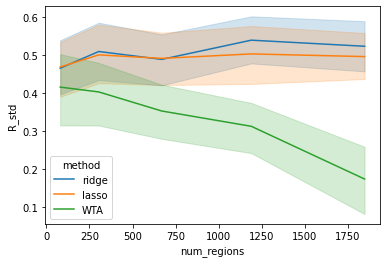

In [18]:
df = vis.get_summary('eval',summary_name="weighted_unique",exps=['sc2'],atlas=['tessels'])
df['R_std']=df.R_eval/df.noiseceiling_XY
sns.lineplot(data=df,x='num_regions',y=df.R_std,hue='method')
print(np.unique(df.num_regions))

In [21]:
# REgion Numbers 
D1= df[df.num_regions==1190]
T=pd.pivot_table(D1,values='R_std',index='subj_id',columns='method',aggfunc=np.mean)
ss.ttest_rel(T.WTA,T.ridge,nan_policy='omit')

Ttest_relResult(statistic=-5.397148339986327, pvalue=1.7511744692943655e-05)

# New evaluation: Weighted-including common

[  80  304  670 1190 1848]


Ttest_relResult(statistic=-4.2210702352222516, pvalue=0.0003516260625423184)

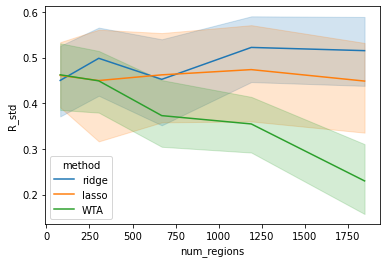

In [3]:
df = vis.get_summary('eval',summary_name="weighted_common",exps=['sc2'],atlas=['tessels'])
df['R_std']=df.R_eval/df.noiseceiling_XY
sns.lineplot(data=df,x='num_regions',y=df.R_std,hue='method')
print(np.unique(df.num_regions))
# REgion Numbers 
D1= df[df.num_regions==1190]
T=pd.pivot_table(D1,values='R_std',index='subj_id',columns='method',aggfunc=np.mean)
ss.ttest_rel(T.WTA,T.ridge,nan_policy='omit')